In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
data = pd.read_csv('train.csv')
target = data['target']
df = data.iloc[:,2:]
#all_zero_l = df.columns[np.where(df_info.loc['zero_rate']==1)]
#df = df.drop(all_zero_l,axis=1)
zero_rate = []
target_cor = []
col_var = []
col_unique_num = []
rank_corr = []
rank_corr_p = []
col_missing_value = df.isnull().sum().sum() # the number is 0, which means no missing value
col_var = df.var(axis=0)

for col in df.columns:
    col_unique_num.append(df[col].nunique())
    target_cor.append(data[['target',col]].corr().values[0][1])
    zero_rate.append(len(df[col].iloc[np.where(df[col]==0)])/len(df[col]))
    coef,p = spearmanr(data.target,df[col])
    rank_corr.append(coef)
    rank_corr_p.append(p)
df_info = {'type':df.dtypes,'var':col_var,'unique_number':col_unique_num,'corr':target_cor,'zero_rate':zero_rate,'spearman_corr':rank_corr,'spearman_corr_p':rank_corr_p}
df_info = pd.DataFrame(df_info).T
df_info

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
type,float64,int64,float64,int64,int64,int64,int64,int64,float64,float64,...,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64
var,1.51578e+11,4.13231e+09,3.2486e+11,5.56547e+10,2.29441e+12,3.32997e+11,5.64415e+11,3.53233e+10,9.23556e+13,2.52116e+12,...,1.65489e+13,1.96151e+13,2.03694e+13,4.67781e+13,9.18592e+07,2.22851e+13,2.607e+12,1.86494e+13,2.67647e+12,3.28023e+12
unique_number,32,5,29,3,6,25,6,6,714,56,...,103,119,207,99,2,28,12,17,39,93
corr,0.010188,0.0138048,0.0146944,-0.00291705,0.0166473,-0.0197855,0.00441715,-0.0155383,0.229035,0.021538,...,0.0241441,-0.00867609,0.0414488,0.0234314,-0.0106142,0.0169066,-0.0091775,0.0183496,-0.0168921,-0.0255749
zero_rate,0.991254,0.999103,0.992599,0.999551,0.998879,0.98946,0.998879,0.998879,0.664947,0.972415,...,0.934739,0.958511,0.844584,0.962996,0.999776,0.992151,0.995963,0.992375,0.982059,0.963445
spearman_corr,-0.0911194,0.0114243,0.00163712,0.00839559,0.012453,-0.0413274,0.000845394,-0.0294818,0.0732701,-0.00467682,...,-0.0461709,-0.033835,-0.033887,0.0102949,-0.0218438,-0.01232,-0.00918067,-0.0086655,-0.0207633,-0.028219
spearman_corr_p,1.09065e-09,0.445657,0.912973,0.575156,0.40577,0.00577882,0.954994,0.0490053,9.68776e-07,0.754879,...,0.00204321,0.0238604,0.0236454,0.49191,0.144731,0.410804,0.539951,0.562931,0.165671,0.059539


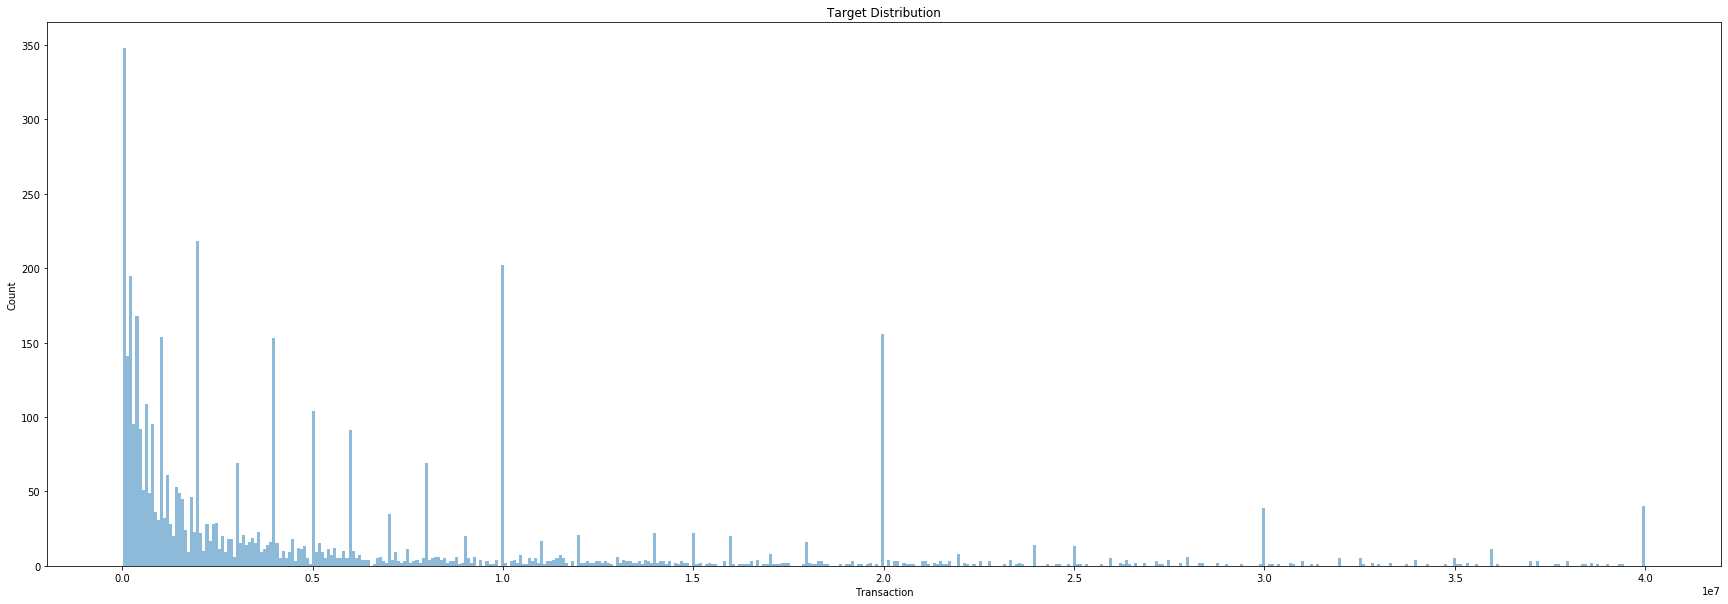

In [3]:
plt.figure(figsize=(30, 10))
plt.hist(data.target,bins=500, alpha = 0.5, histtype='bar') # Transactions tend to in X0000 (int)
plt.xlabel('Transaction')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [16]:
#Check feature correlation with target
all_zero_l = df.columns[np.where(df_info.loc['zero_rate']>=0.95)]
df_clean = df.drop(all_zero_l,axis=1)
corrs = []
for col in df_clean.columns:
    corrs.append(data['target'].corr(df_clean[col]))


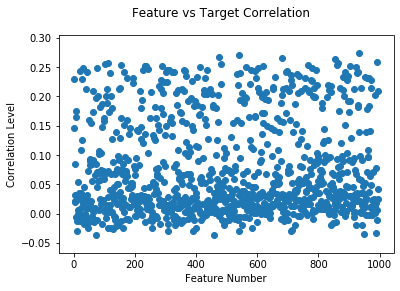

In [20]:
plt.scatter(range(len(df_clean.columns)),corrs)
plt.suptitle('Feature vs Target Correlation')
plt.xlabel('Feature Number')
plt.ylabel('Correlation Level')
plt.show()

In [6]:
#check feature correlation with target
df_info = df_info.sort_values(by='corr', ascending=False, axis=1)
high_corr_col = df_info.columns[np.where(df_info.loc['corr']>=0.2)]
df_high_corr = df[high_corr_col]
df_info[high_corr_col].sort_values(by='zero_rate', ascending=False, axis=1)

,150dc0956,8d12d44e1,482715cbd,dda820122,f81c2f1dd,d47c58fe2,f3cf9341c,cf488d633,555f18bd3,ddea5dc65,...,491b9ee45,1db387535,23310aa6f,70feb1494,6619d81fc,5c6487af1,f190486d6,0572565c2,c47340d97,91f701ba2
type,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
var,8.10557e+12,8.43468e+12,8.86586e+12,9.84002e+12,1.07147e+13,7.13364e+12,7.31411e+12,1.57731e+13,7.3146e+12,1.74587e+13,...,9.38387e+13,8.85647e+13,9.21694e+13,6.38357e+13,9.21608e+13,8.34105e+13,7.93295e+13,9.29112e+13,9.29542e+13,9.35841e+13
unique_number,69,59,58,55,66,205,216,197,203,178,...,591,562,591,582,564,631,765,530,531,548
corr,0.203817,0.201536,0.207797,0.212569,0.210881,0.213259,0.252583,0.232959,0.273379,0.233519,...,0.213769,0.207491,0.201988,0.248898,0.200045,0.209962,0.263821,0.201068,0.213456,0.206891
zero_rate,0.965239,0.964118,0.963669,0.962996,0.961202,0.929356,0.927786,0.927562,0.927338,0.927114,...,0.658444,0.657995,0.656425,0.656425,0.656201,0.654855,0.653734,0.653061,0.651267,0.650146
spearman_corr,0.0396267,0.0466219,0.0368996,0.0549678,0.0481663,0.0420168,0.0659993,0.0511323,0.0576873,0.0744786,...,0.0323363,0.00646607,0.0333862,0.0368901,0.026735,0.02121,0.107678,0.013543,0.020268,0.0238858
spearman_corr_p,0.00813532,0.00184549,0.013734,0.00024041,0.00129401,0.00501367,1.03026e-05,0.000636246,0.000116087,6.39519e-07,...,0.0308316,0.665988,0.0257885,0.0137582,0.0742498,0.156754,5.62561e-13,0.365926,0.176,0.110763


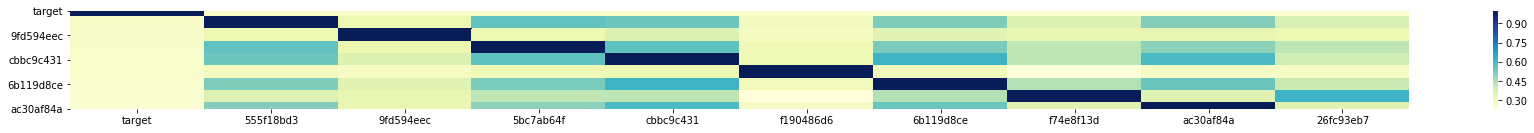

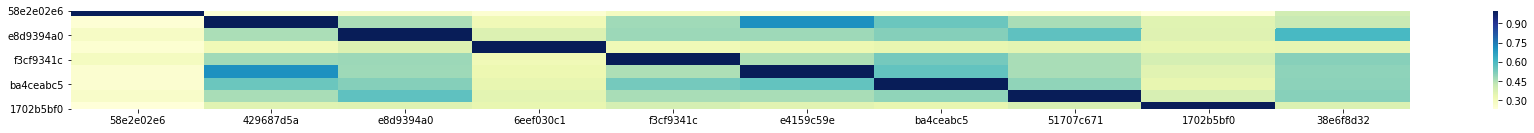

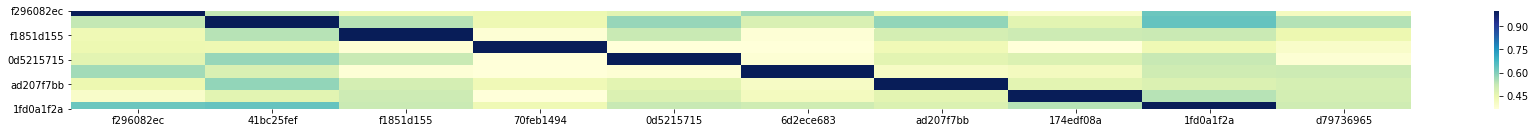

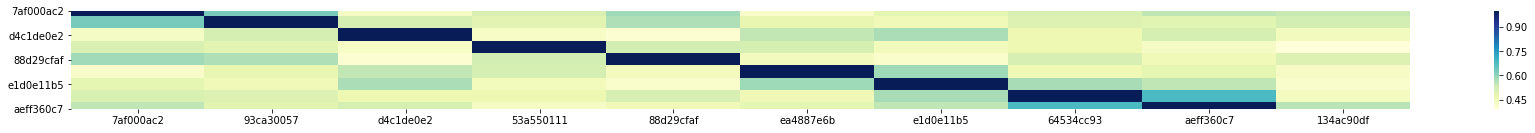

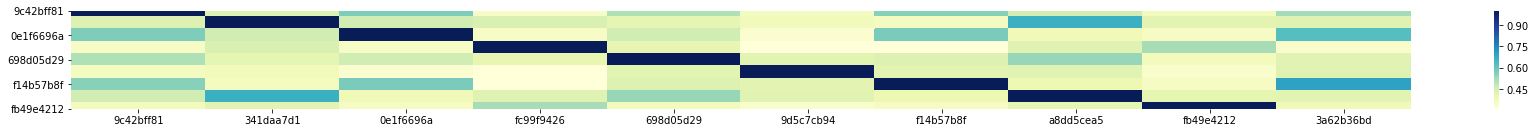

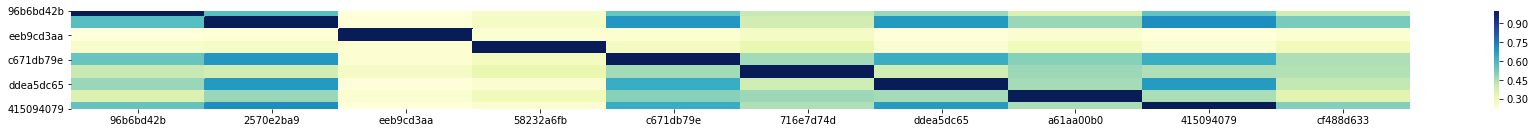

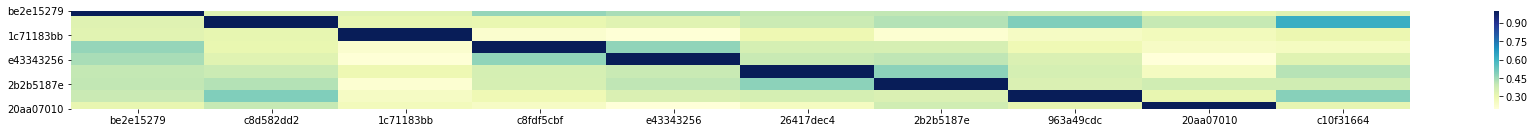

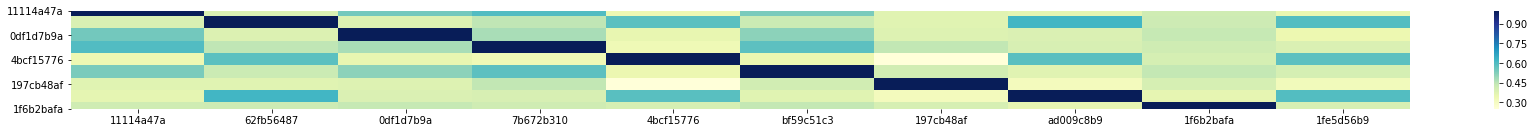

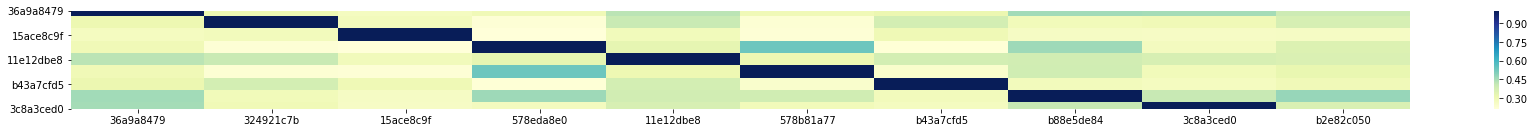

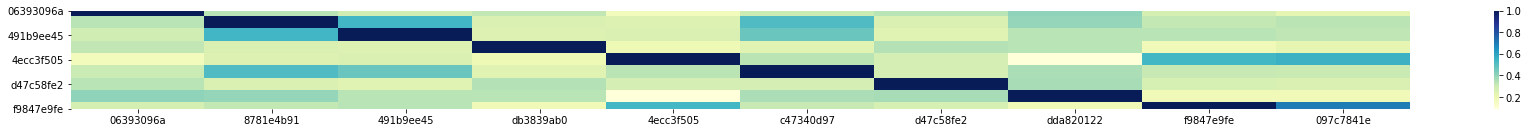

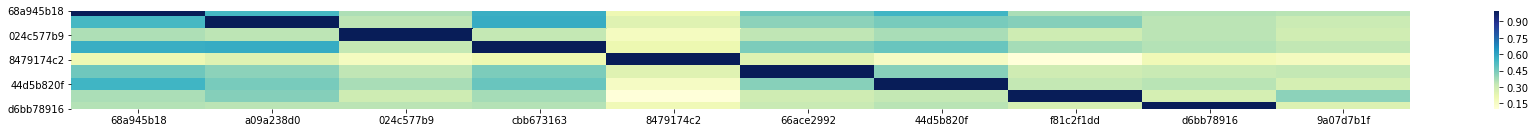

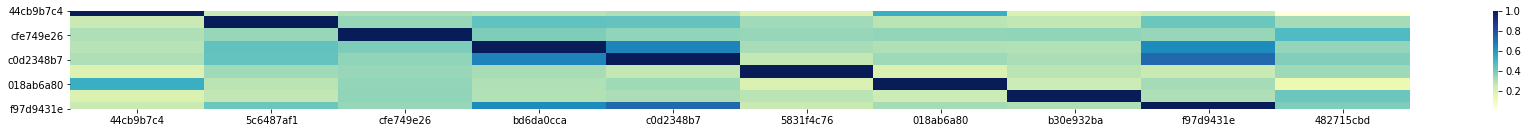

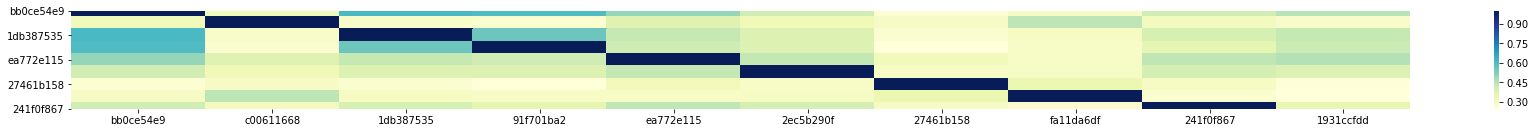

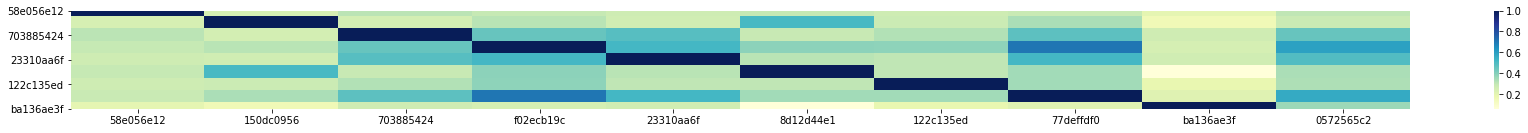

In [7]:
data_heatmap = data[['target'] + high_corr_col.values.tolist()].corr()
for i in range(int(len(high_corr_col)/10)):
    plt.figure(figsize=(30, 30))
    plt.subplot(int(len(high_corr_col)/10), 1, i+1)
    sns.heatmap(data_heatmap.iloc[10*i:10+10*i,10*i:10+10*i],cmap="YlGnBu")
plt.show()